In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_11616\1825103310.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Machine Learning Q1

Machine learning is the procress of computer algorithms solving complex problems through the application of large amounts of data. There are multiple types od machine learning, but the ones we have touched on are supervised and unsupervised learning. So when is it appropriate to use machine learning? Machine learning excels in problems with vasts amounts of data. Not only is this because computers can process this data so much faster than humans, but it decreases the chances of errors and incorrect computations being delivered. Machine Learning also excels at solving problems with data that is dynamic and constantly changes. The whole idea of machine learning is the algorithim being able to adapt by utilizing a large number of trials to continuely get closer to a goal. If the problem is dynamic then the algorithm with continuely be faced with new problems, in return making the computer algorithm stronger at solving these problems in he future. With its uses it also bring times where it can be counter intuitive to use machine learning. Like mentioned earlier machine learning excels at complec and vast problems. Using machine learning to solve a simple smaller problem can end up being counter intuitive. If the problem has little data and has a pretty straight forward process to solving the problem, using machine learning can take longer than just solving it generically. Also with smaller data sets, the computations are likley going to have higher rates of error, causing for human intervention to be more likely. Machine learning can be counter intuitive when the data stays static. This gives machine learning less problems it needs to solve and doesn't fully utilize the build in potentials of machine learning.

# Preprocessing

Step 1 - cleaning up sex column (np.where)

In [3]:
df['Sex'] = np.where(df['Sex'] == "male", "M",
                     np.where(df['Sex'] == 'female', 'F','other'))

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",M,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,NaN,C


Step 2 - Remove ms, mrs, and mr from name and make it its own column. (str.replace and np.where)

In [5]:
df["mr/mrs"] = np.where(df["Name"].str.contains("Mrs."),"Mrs",
                                np.where(df["Name"].str.contains("Ms."),"Ms",
                                        np.where(df['Name'].str.contains('Miss.'),'Ms',
                                                np.where(df['Name'].str.contains("Mr."),'Mr','Unknown'))))                                         

In [6]:
df['Name'] = df['Name'].str.replace("Mr.","")
df['Name'] = df['Name'].str.replace('Miss.',"")
df['Name'] = df['Name'].str.replace('Mrs.',"")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr/mrs
0,1,0,3,"Braund, Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",F,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Mr


Step 3 - Fix NaN values in Cabin Column (fillna, looked this one up) 

In [7]:
Cabin_proc = df['Cabin']
df['Cabin'].fillna('Unknown', inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr/mrs
0,1,0,3,"Braund, Owen Harris",M,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",F,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Ms
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, William Henry",M,35.0,0,0,373450,8.0500,Unknown,S,Mr


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
mr/mrs          object
dtype: object

<Axes: >

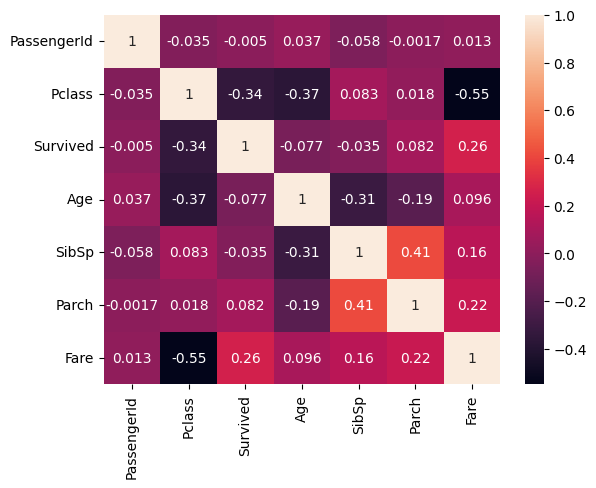

In [9]:
float_df = df[['PassengerId', 'Pclass','Survived', 'Age','SibSp', 'Parch', 'Fare']]
correlation = float_df.corr()
sns.heatmap(correlation, annot=True)

So i tried to create a heatmap with the all the columns of the data involved, but all the non-float and integer values were unable to be converted. So I checked all of the data types using .dtypes then set a new df = to all the integer and float values of the data. After that I set the correlation = to that data frame and it worked. It didn't cross my mind that I couldn't use some columns because they have no numerical value. I even tried to change the data type using .astype but I got a similar error. As for what the heatmap says I would look at how survival correlates with other data, but the other thing with really any correlation at all is the price the passenger payed correlated slighlty with survival rates. I believe this is due to the nicer cabins being higher up on the ship therefore close to the lifeboats. If I could go back I would change the Sex column to an integer value because I am sure there would be a correlation with sex and survival.


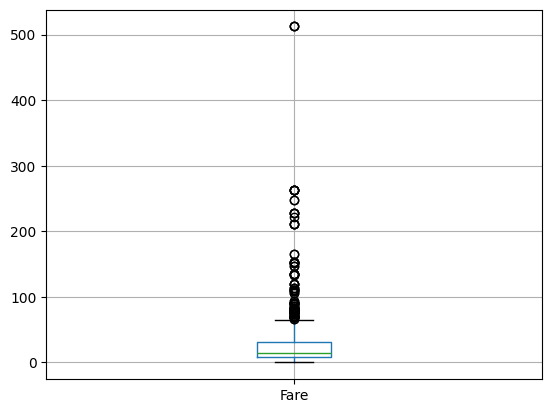

In [10]:
boxplot = df.boxplot(column=['Fare'], return_type ='axes')

There seems to be no null values or any I found in the data for fare, so I did nothing to them. The boxplot shows that the mean of the fares is less than 10.0. Howevere there are an immense amount of outliers above 70 dollars, ranging from 65/70 - 500+. This shows that there were a lot of middle class people on the vessel, but the wealthy were super wealthy.

In [36]:
import time

In [49]:
df['Age'] = df['age_bin'].apply(lambda x: '0-20' if x <= 20 else ('21-40' if x <= 40 else ('41-60' if x <= 60 else '61+')))

TypeError: '<=' not supported between instances of 'str' and 'int'

In [45]:
df = df.assign(age_bin=lambda x: df['Age'].apply(lambda x: '0-20' if x <= 20 else ('21-40' if x <= 40 else ('41-60' if x <= 60 else '61+'))))
df
#first method with lambdas
time.perf_counter()

1920.0222051

In [47]:
#method 2 using np.where
cat = [0, 20, 40, 60]
subcat = ['0-20', '21-40', '41-60', '61+']

df['age_bin'] = np.where(df['Age'] <= 20, '0-20',
                         np.where(df['Age'] <= 40, '21-40',
                                  np.where(df['Age'] <= 60, '41-60', '61+'))) 
time.perf_counter()

1930.3999395

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mr/mrs,age_bin
0,1,0,3,"Braund, Owen Harris",M,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,21-40
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",F,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,21-40
2,3,1,3,"Heikkinen, Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Ms,21-40
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Mrs,21-40
4,5,0,3,"Allen, William Henry",M,35.0,0,0,373450,8.0500,Unknown,S,Mr,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.0,0,0,211536,13.0000,Unknown,S,Unknown,21-40
887,888,1,1,"Graham, Margaret Edith",F,19.0,0,0,112053,30.0000,B42,S,Ms,0-20
888,889,0,3,"Johnston, Catherine Helen ""Carrie""",F,NaN,1,2,W./C. 6607,23.4500,Unknown,S,Ms,61+
889,890,1,1,"Behr, Karl Howell",M,26.0,0,0,111369,30.0000,C148,C,Mr,21-40


I struggled for a while trying to write the lambda code in one line. I tried using the . assign for all of it bit it was giving me an error when I tried to set x < or> a value. So I ended up using .apply as well. still not really sure what it does to the .assign. For the second method I used np.where and I am starting to understand why last semesters students liked it so much. It is way more straight forward than lambdas. I added a timer at the bottom, but I am pretty sure all it is doing is timing the time this jupyter notebook is open and not how the code is running. I am unsure on how to set it to the code, and I am at a loss of ideas and internet sources.

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

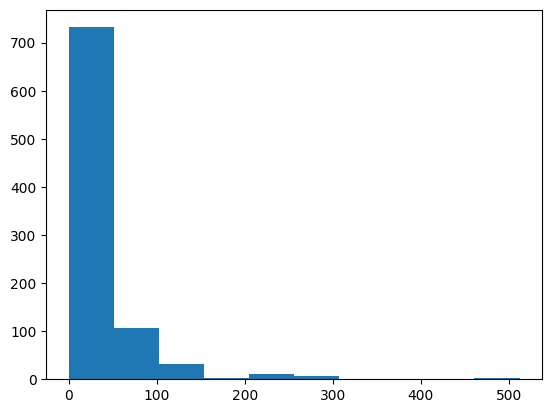

In [78]:
plt.hist(df['Fare'])

(array([385.,   0.,   0., 199.,   0.,   0., 128.,   0.,   0., 179.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

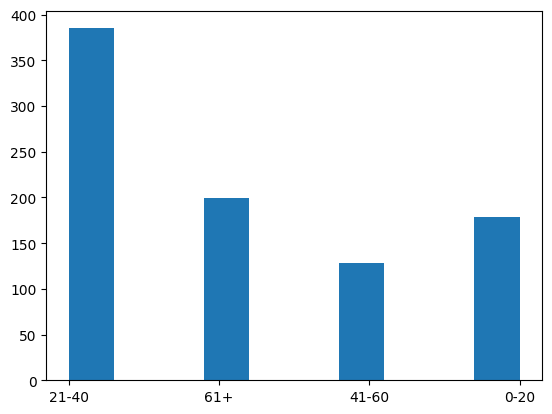

In [83]:
plt.hist(df['age_bin'])

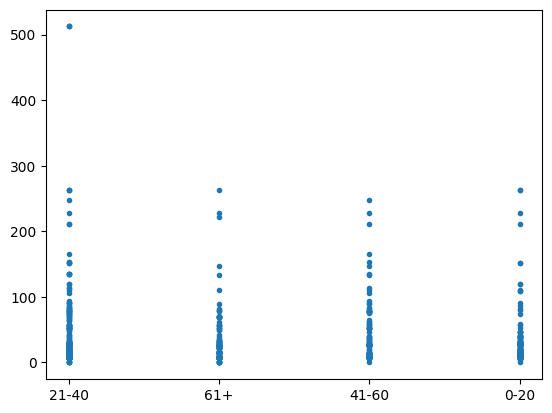

In [82]:
plt.plot(df['age_bin'],df['Fare'],'.')

I graphed two histograms of the data and tried to put them into one histogram, but I could not figure it out. I am not sure if this is what you were asking for, but from the data of the wo histograms we can see the fares are overwhelmingly under 100 on average. The data for the age_bin is more spread out shwoing most of the passengers are between 21 and 40. the other three age groups are pretty even spread. The dot plot shows how all age groups are pretty even on the mean fare amounts they pay. 21-40 is has more points by a lot, but the average is still almsot identical. There is also one outlier at 500+